In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import datasets, layers , models, Sequential

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images/255, testing_images/255

class_names = ['Plane', 'Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

170500096/170498071 [==============================] - 3s 0us/step


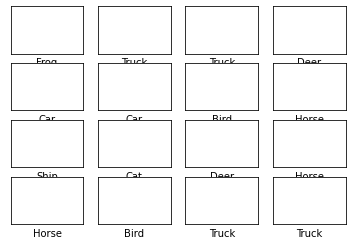

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.imshow(training_images[i],cmap=plt.co.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()    

In [ ]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images,testing_labels))


Epoch 1/10
625/625 [==============================] - 27s 42ms/step - loss: 1.8079 - accuracy: 0.3280 - val_loss: 1.4901 - val_accuracy: 0.4515
Epoch 2/10
625/625 [==============================] - 26s 42ms/step - loss: 1.4477 - accuracy: 0.4736 - val_loss: 1.3578 - val_accuracy: 0.5113
Epoch 3/10
625/625 [==============================] - 26s 42ms/step - loss: 1.3083 - accuracy: 0.5311 - val_loss: 1.2733 - val_accuracy: 0.5460
Epoch 4/10
625/625 [==============================] - 26s 42ms/step - loss: 1.2014 - accuracy: 0.5703 - val_loss: 1.2879 - val_accuracy: 0.5385
Epoch 5/10
625/625 [==============================] - 26s 42ms/step - loss: 1.1144 - accuracy: 0.6048 - val_loss: 1.1931 - val_accuracy: 0.5720
Epoch 6/10
625/625 [==============================] - 26s 42ms/step - loss: 1.0459 - accuracy: 0.6319 - val_loss: 1.1677 - val_accuracy: 0.5875
Epoch 7/10
625/625 [==============================] - 26s 42ms/step - loss: 0.9655 - accuracy: 0.6579 - val_loss: 1.1555 - val_accuracy:

In [ ]:
loss,accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 [==============================] - 1s 11ms/step - loss: 1.0794 - accuracy: 0.6327
Loss: 1.0794248580932617
Accuracy: 0.6327499747276306


In [ ]:
model.save('image_classifier.model')

#model = models.load_model()

INFO:tensorflow:Assets written to: image_classifier.model/assets
